<a href="https://colab.research.google.com/github/DEYVI1/Colabs/blob/main/Pandas_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install pandas
!pip install gdown

In [4]:
import pandas as pd
import numpy as np


# Descargar datos limpios
Inventario de vivienda
Contiene la información que da cuenta de las viviendas y el entorno urbano en el que se están desarrollando.

Año:
2017 al 2023

- [Link](https://sniiv.sedatu.gob.mx/Reporte/Datos_abiertos)
- [Diccionario](https://sniiv.sedatu.gob.mx/Reporte/Datos_abiertos#:~:text=Diccionario%20de%20datos)


In [5]:
!git clone https://github.com/javierIA/infonavit.git

Cloning into 'infonavit'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 11 (delta 6), reused 7 (delta 3), pack-reused 0
Receiving objects: 100% (11/11), 26.28 MiB | 11.23 MiB/s, done.
Resolving deltas: 100% (6/6), done.
Updating files: 100% (7/7), done.


In [6]:
#@title UnirVarios DTF CON EL mismo formato
import pandas as pd
import os

# Create an empty list to store the dataframes
dfs = []

# Iterate over each CSV file in the "Datos" directory
for file_name in os.listdir("infonavit"):
    if file_name.endswith(".csv"):
        file_path = os.path.join("infonavit", file_name)
        df = pd.read_csv(file_path, encoding="latin1")
        dfs.append(df)
print(dfs)
merged_df = pd.concat(dfs, ignore_index=True)

# Convert merged dataframe to Parquet format
output_file = "merged_data.parquet"
merged_df.to_parquet(output_file, engine="pyarrow")

print(f"Data converted to Parquet format and saved as {output_file}")


[         año  mes  cve_ent         entidad  cve_mun       municipio  \
0       2018    1      NaN  No distribuido      NaN  No distribuido   
1       2018    1      NaN  No distribuido      NaN  No distribuido   
2       2018    1      NaN  No distribuido      NaN  No distribuido   
3       2018    1      NaN  No distribuido      NaN  No distribuido   
4       2018    1      NaN  No distribuido      NaN  No distribuido   
...      ...  ...      ...             ...      ...             ...   
416779  2018   12     32.0       Zacatecas     57.0        Trancoso   
416780  2018   12     32.0       Zacatecas     57.0        Trancoso   
416781  2018   12     32.0       Zacatecas     57.0        Trancoso   
416782  2018   12     32.0       Zacatecas     57.0        Trancoso   
416783  2018   12     32.0       Zacatecas     57.0        Trancoso   

        organismo  modalidad  destino  tipo  sexo  edad_rango  ingresos_rango  \
0               4          1     10.0     1   NaN         NaN    

In [7]:
db=pd.read_parquet("/content/merged_data.parquet")

db.to_csv('dataSQL.csv')

# Llenar un columna con datos vacios de otra

In [8]:
db.describe().T

,count,mean,std,min,25%,50%,75%,max
año,2229569.0,2.019457e+03,1.673627e+00,2017.00,2018.0,2019.00,2021.00,2.022000e+03
mes,2315296.0,6.698356e+00,3.427975e+00,1.00,4.0,7.00,10.00,1.200000e+01
cve_ent,2314990.0,1.662320e+01,8.367111e+00,1.00,10.0,15.00,23.00,3.200000e+01
cve_mun,2310658.0,4.327088e+01,5.346035e+01,1.00,10.0,27.00,54.00,5.700000e+02
organismo,2315296.0,2.040924e+00,1.936413e+00,1.00,1.0,2.00,2.00,2.600000e+01
modalidad,2315296.0,2.019879e+00,8.984140e-01,1.00,1.0,2.00,3.00,4.000000e+00
destino,2307319.0,2.307388e+00,1.591711e+00,1.00,1.0,2.00,3.00,1.800000e+01
tipo,2315296.0,1.372196e+00,4.833903e-01,1.00,1.0,1.00,2.00,2.000000e+00
sexo,2302037.0,1.425450e+00,4.944112e-01,1.00,1.0,1.00,2.00,2.000000e+00
edad_rango,2272656.0,1.800512e+00,5.160368e-01,1.00,1.0,2.00,2.00,3.000000e+00


In [9]:
valores_nulos = db.isnull().mean() * 100
valores_nulos

año                3.702637
mes                0.000000
cve_ent            0.013216
entidad            0.000000
cve_mun            0.200320
municipio         18.768227
organismo          0.000000
modalidad          0.000000
destino            0.344535
tipo               0.000000
sexo               0.572670
edad_rango         1.841665
ingresos_rango     3.928785
vivienda_valor    18.903587
acciones           0.000000
monto              0.000000
minicipio         81.231773
aÃ±o              96.297363
dtype: float64

In [10]:
db['municipio'] = db['municipio'].fillna(db['minicipio'])
db['año'] = db['año'].fillna(db['aÃ±o'])
db.drop(['aÃ±o','minicipio'], axis=1, inplace=True)
db

,año,mes,cve_ent,entidad,cve_mun,municipio,organismo,modalidad,destino,tipo,sexo,edad_rango,ingresos_rango,vivienda_valor,acciones,monto
0,2018.0,1,NaN,No distribuido,NaN,No distribuido,4,1,10.0,1,NaN,NaN,NaN,NaN,0.0,13732400.00
1,2018.0,1,NaN,No distribuido,NaN,No distribuido,4,2,1.0,1,NaN,NaN,NaN,NaN,0.0,91871861.99
2,2018.0,1,NaN,No distribuido,NaN,No distribuido,10,1,2.0,2,1.0,2.0,1.0,3.0,1.0,536000.00
3,2018.0,1,NaN,No distribuido,NaN,No distribuido,10,1,2.0,2,1.0,2.0,2.0,3.0,6.0,4354000.00
4,2018.0,1,NaN,No distribuido,NaN,No distribuido,10,1,2.0,2,1.0,2.0,2.0,4.0,7.0,6006000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2315291,2022.0,12,32.0,Zacatecas,56.0,Zacatecas,3,3,3.0,1,1.0,2.0,5.0,4.0,1.0,1300000.00
2315292,2022.0,12,32.0,Zacatecas,56.0,Zacatecas,3,3,3.0,1,2.0,2.0,2.0,3.0,2.0,1286846.81
2315293,2022.0,12,32.0,Zacatecas,56.0,Zacatecas,3,4,4.0,1,1.0,2.0,6.0,5.0,1.0,1200260.91
2315294,2022.0,12,32.0,Zacatecas,56.0,Zacatecas,3,4,4.0,1,2.0,2.0,2.0,4.0,1.0,444083.80


# Re ordenar las columnas de acuerdo orden original


In [11]:
column_order = ['año', 'municipio', 'mes', 'cve_ent', 'entidad', 'cve_mun', 'organismo', 'modalidad', 'destino', 'tipo', 'sexo', 'edad_rango', 'ingresos_rango', 'vivienda_valor', 'acciones', 'monto']

db = db.reindex(columns=column_order)

In [ ]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2315296 entries, 0 to 2315295
Data columns (total 16 columns):
 #   Column          Dtype  
---  ------          -----  
 0   año             float64
 1   municipio       object 
 2   mes             int64  
 3   cve_ent         float64
 4   entidad         object 
 5   cve_mun         float64
 6   organismo       int64  
 7   modalidad       int64  
 8   destino         float64
 9   tipo            int64  
 10  sexo            float64
 11  edad_rango      float64
 12  ingresos_rango  float64
 13  vivienda_valor  float64
 14  acciones        float64
 15  monto           float64
dtypes: float64(10), int64(4), object(2)
memory usage: 282.6+ MB


# Diccionario

Para reemplazar los códigos de rango de edad con sus descripciones correspondientes en la columna 'edad_rango', puedes utilizar el método replace de pandas. Aquí tienes un ejemplo de cómo hacerlo

In [12]:
age_dict = {
    1: '29 o menos',
    2: '30 a 59',
    3: '60 o más',
    4: 'No especificado',
}

db['edad_rango'] = db['edad_rango'].replace(age_dict)
db.edad_rango

0              NaN
1              NaN
2          30 a 59
3          30 a 59
4          30 a 59
            ...   
2315291    30 a 59
2315292    30 a 59
2315293    30 a 59
2315294    30 a 59
2315295    30 a 59
Name: edad_rango, Length: 2315296, dtype: object

In [13]:
# Supongamos que 'merged_df' es el dataframe combinado
income_dict = {
    1: '2.6 o menos',
    2: '2.61 a 4.00',
    3: '4.01 a 6.00',
    4: '6.01 a 9.00',
    5: '9.01 a 12.00',
    6: 'Más de 12',
    7: 'No especificado'
}

# Reemplazar los códigos de rango de ingresos con las descripciones correspondientes
db['ingresos_rango'] = db['ingresos_rango'].replace(income_dict)

# Imprimir el dataframe actualizado
print(db)


            año       municipio  mes  cve_ent         entidad  cve_mun  \
0        2018.0  No distribuido    1      NaN  No distribuido      NaN   
1        2018.0  No distribuido    1      NaN  No distribuido      NaN   
2        2018.0  No distribuido    1      NaN  No distribuido      NaN   
3        2018.0  No distribuido    1      NaN  No distribuido      NaN   
4        2018.0  No distribuido    1      NaN  No distribuido      NaN   
...         ...             ...  ...      ...             ...      ...   
2315291  2022.0       Zacatecas   12     32.0       Zacatecas     56.0   
2315292  2022.0       Zacatecas   12     32.0       Zacatecas     56.0   
2315293  2022.0       Zacatecas   12     32.0       Zacatecas     56.0   
2315294  2022.0       Zacatecas   12     32.0       Zacatecas     56.0   
2315295  2022.0       Zacatecas   12     32.0       Zacatecas     56.0   

         organismo  modalidad  destino  tipo  sexo edad_rango ingresos_rango  \
0                4          1  

Para reemplazar los códigos de valor de vivienda con sus descripciones correspondientes en la columna 'vivienda_valor', puedes utilizar el método replace de pandas. Aquí tienes un ejemplo de cómo hacerlo:



In [14]:
housing_dict = {
    1: 'Económica',
    2: 'Popular',
    3: 'Tradicional',
    4: 'Media',
    5: 'Residencial',
    6: 'Residencial plus',
    7: 'No especificado'
}

db['vivienda_valor'] = db['vivienda_valor'].replace(housing_dict)

print(db)


            año       municipio  mes  cve_ent         entidad  cve_mun  \
0        2018.0  No distribuido    1      NaN  No distribuido      NaN   
1        2018.0  No distribuido    1      NaN  No distribuido      NaN   
2        2018.0  No distribuido    1      NaN  No distribuido      NaN   
3        2018.0  No distribuido    1      NaN  No distribuido      NaN   
4        2018.0  No distribuido    1      NaN  No distribuido      NaN   
...         ...             ...  ...      ...             ...      ...   
2315291  2022.0       Zacatecas   12     32.0       Zacatecas     56.0   
2315292  2022.0       Zacatecas   12     32.0       Zacatecas     56.0   
2315293  2022.0       Zacatecas   12     32.0       Zacatecas     56.0   
2315294  2022.0       Zacatecas   12     32.0       Zacatecas     56.0   
2315295  2022.0       Zacatecas   12     32.0       Zacatecas     56.0   

         organismo  modalidad  destino  tipo  sexo edad_rango ingresos_rango  \
0                4          1  

In [15]:
organism_dict = {
    1: "INFONAVIT",
    2: "CNBV",
    3: "FOVISSSTE",
    4: "SHF",
    5: "CONAVI",
    6: "INVI",
    7: "Banjercito",
    8: "Hábitat México",
    9: "CFE",
    10: "ISSFAM",
    11: "PEMEX",
    12: "FONHAPO",
    13: "PDZP SEDESOL",
    14: "SOFOLES AMFE",
    15: "ISSSTELEON",
    16: "INDIVI",
    17: "COVEG",
    18: "COESVI",
    19: "IMEVIS",
    20: "IVEM",
    21: "ITAVU",
    22: "IVNL",
    23: "INVIVIENDA",
    24: "IVEY",
    25: "INFOVIR",
    26: "Instituto Nacional del Suelo Sustentable"
}

db['organismo'].replace(organism_dict, inplace=True)

print(db)


            año       municipio  mes  cve_ent         entidad  cve_mun  \
0        2018.0  No distribuido    1      NaN  No distribuido      NaN   
1        2018.0  No distribuido    1      NaN  No distribuido      NaN   
2        2018.0  No distribuido    1      NaN  No distribuido      NaN   
3        2018.0  No distribuido    1      NaN  No distribuido      NaN   
4        2018.0  No distribuido    1      NaN  No distribuido      NaN   
...         ...             ...  ...      ...             ...      ...   
2315291  2022.0       Zacatecas   12     32.0       Zacatecas     56.0   
2315292  2022.0       Zacatecas   12     32.0       Zacatecas     56.0   
2315293  2022.0       Zacatecas   12     32.0       Zacatecas     56.0   
2315294  2022.0       Zacatecas   12     32.0       Zacatecas     56.0   
2315295  2022.0       Zacatecas   12     32.0       Zacatecas     56.0   

         organismo  modalidad  destino  tipo  sexo edad_rango ingresos_rango  \
0              SHF          1  

Graficar con m

In [16]:
db.to_csv("data.csv")
db.head(10)
db.shape

(2315296, 16)



---
# Haz un histograma de la columna 'año'



Text(0, 0.5, 'Frecuencia')

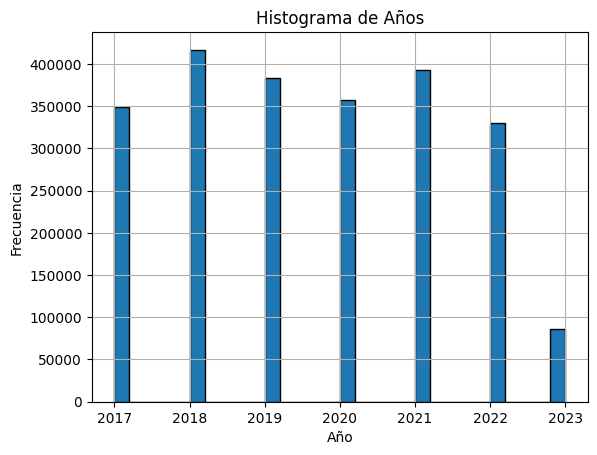

In [ ]:
import matplotlib.pyplot as plt

# Haz un histograma de la columna 'año'
db['año'].hist(bins=30, edgecolor='black')

# Añade títulos y etiquetas
plt.title('Histograma de Años')
plt.xlabel('Año')
plt.ylabel('Frecuencia')


INFONAVIT                                   1131684
CNBV                                         713844
FOVISSSTE                                    211375
SHF                                          125001
CONAVI                                        72172
FONHAPO                                       27759
CFE                                            8517
INVI                                           8347
ISSFAM                                         4807
Banjercito                                     4282
Instituto Nacional del Suelo Sustentable       4021
Hábitat México                                 3269
PEMEX                                           218
Name: organismo, dtype: int64


<Axes: >

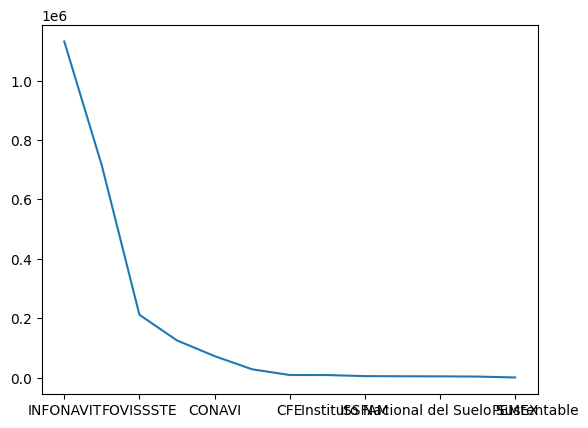

In [25]:
print(db['organismo'].value_counts())
db['organismo'].value_counts().plot(kind='line')
#plt.title('Número de Acciones por Organismo')
#plt.xlabel('Organismo')
#plt.ylabel('Número de Acciones')
#plt.show()


Axes(0.125,0.11;0.775x0.77)


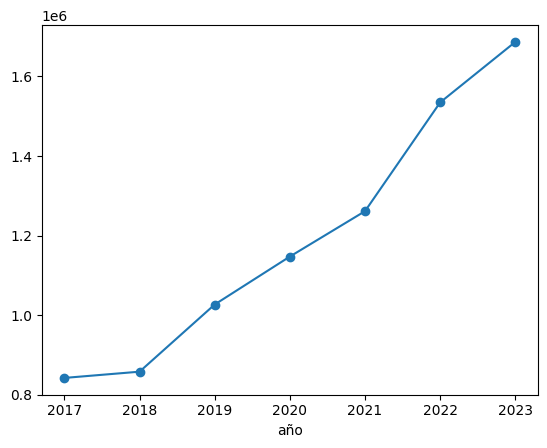

In [26]:
data_grouped = db.groupby('año')['monto'].mean().plot(kind='line',marker='o')

# Dibuja el gráfico de líneas

print(data_grouped)
#plt.plot(data_grouped.index, data_grouped.values, marker='o')

# Añade títulos y etiquetas
#plt.title('Cambio en el Monto a lo largo de los Años')
#plt.xlabel('Año')
#plt.ylabel('Monto Promedio')

#plt.show()

In [27]:
db.shape

(2315296, 16)

# Se duplico el gasto de costo de vivienda